##1. IMPORTING LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score
import warnings
warnings.filterwarnings('ignore')

##2. LOAD THE DATASHEET

In [ ]:
df=pd.read_csv("phishing.csv")

In [ ]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [ ]:
df.tail()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
11049,11049,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,11050,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,11051,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11052,11052,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1
11053,11053,-1,-1,1,1,1,-1,-1,-1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


##3.Handling null values

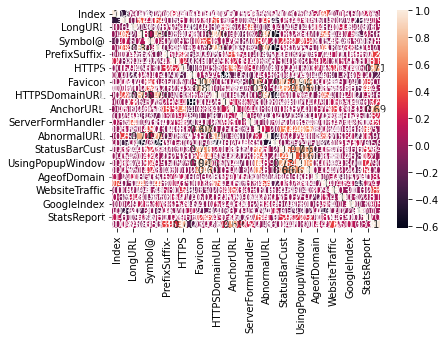

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.describe()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,5526.500000,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,3191.159272,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2763.250000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5526.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8289.750000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11053.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.skew()

Index                  0.000000
UsingIP               -0.661342
LongURL                1.636786
ShortURL              -2.192416
Symbol@               -1.963742
Redirecting//         -2.211464
PrefixSuffix-          2.167821
SubDomains            -0.118301
HTTPS                 -0.515749
DomainRegLen           0.715279
Favicon               -1.616512
NonStdPort            -2.125557
HTTPSDomainURL        -1.831118
RequestURL            -0.380176
AnchorURL              0.112881
LinksInScriptTags      0.202836
ServerFormHandler      1.475908
InfoEmail             -1.647633
AbnormalURL           -1.990908
WebsiteForwarding      2.403144
StatusBarCust         -2.354275
DisableRightClick     -4.502576
UsingPopupWindow      -1.553377
IframeRedirection     -2.832998
AgeofDomain           -0.122919
DNSRecording          -0.814780
WebsiteTraffic        -0.576780
PageRank               1.105233
GoogleIndex           -2.084589
LinksPointingToPage   -0.172257
StatsReport           -2.073729
class   

In [ ]:
df.shape

(11054, 32)

In [ ]:
df.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [ ]:
df.isnull().any()

Index                  False
UsingIP                False
LongURL                False
ShortURL               False
Symbol@                False
Redirecting//          False
PrefixSuffix-          False
SubDomains             False
HTTPS                  False
DomainRegLen           False
Favicon                False
NonStdPort             False
HTTPSDomainURL         False
RequestURL             False
AnchorURL              False
LinksInScriptTags      False
ServerFormHandler      False
InfoEmail              False
AbnormalURL            False
WebsiteForwarding      False
StatusBarCust          False
DisableRightClick      False
UsingPopupWindow       False
IframeRedirection      False
AgeofDomain            False
DNSRecording           False
WebsiteTraffic         False
PageRank               False
GoogleIndex            False
LinksPointingToPage    False
StatsReport            False
class                  False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [ ]:
df.mean()

Index                  5526.500000
UsingIP                   0.313914
LongURL                  -0.633345
ShortURL                  0.738737
Symbol@                   0.700561
Redirecting//             0.741632
PrefixSuffix-            -0.734938
SubDomains                0.064049
HTTPS                     0.251040
DomainRegLen             -0.336711
Favicon                   0.628551
NonStdPort                0.728243
HTTPSDomainURL            0.675231
RequestURL                0.186720
AnchorURL                -0.076443
LinksInScriptTags        -0.118238
ServerFormHandler        -0.595712
InfoEmail                 0.635788
AbnormalURL               0.705446
WebsiteForwarding         0.115705
StatusBarCust             0.762077
DisableRightClick         0.913877
UsingPopupWindow          0.613353
IframeRedirection         0.816899
AgeofDomain               0.061335
DNSRecording              0.377239
WebsiteTraffic            0.287407
PageRank                 -0.483626
GoogleIndex         

In [ ]:
df.median()

Index                  5526.5
UsingIP                   1.0
LongURL                  -1.0
ShortURL                  1.0
Symbol@                   1.0
Redirecting//             1.0
PrefixSuffix-            -1.0
SubDomains                0.0
HTTPS                     1.0
DomainRegLen             -1.0
Favicon                   1.0
NonStdPort                1.0
HTTPSDomainURL            1.0
RequestURL                1.0
AnchorURL                 0.0
LinksInScriptTags         0.0
ServerFormHandler        -1.0
InfoEmail                 1.0
AbnormalURL               1.0
WebsiteForwarding         0.0
StatusBarCust             1.0
DisableRightClick         1.0
UsingPopupWindow          1.0
IframeRedirection         1.0
AgeofDomain               1.0
DNSRecording              1.0
WebsiteTraffic            1.0
PageRank                 -1.0
GoogleIndex               1.0
LinksPointingToPage       0.0
StatsReport               1.0
class                     1.0
dtype: float64

In [ ]:
iq=df.quantile(q=[0.75,0.25])
iq

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0.75,8289.75,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.25,2763.25,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,-1.0,-1.0,0.0,-1.0,1.0,0.0,1.0,-1.0


##4. Splitting the data 

In [ ]:
X = df.iloc[:,1:31].values
Y = df.iloc[:,-1].values
print(X,Y)

[[ 1  1  1 ...  1  1  1]
 [ 1  0  1 ...  1  0 -1]
 [ 1  0  1 ...  1 -1  1]
 ...
 [ 1 -1  1 ...  1  0  1]
 [-1 -1  1 ...  1  1  1]
 [-1 -1  1 ... -1  1 -1]] [-1 -1 -1 ... -1 -1 -1]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8843, 30), (2211, 30), (8843,), (2211,))

In [ ]:
x_test.shape,x_train.shape

((2211, 30), (8843, 30))

In [ ]:
y_test.shape,y_train.shape

((2211,), (8843,))

##5. Model building

In [ ]:
ML_Model = []
Test = []
def results(model, p):
  ML_Model.append(model)
  Test.append(p)

###Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier()
dtc1.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred1 = dtc1.predict(x_test)
s1=accuracy_score(y_test,pred1)*100
print("Accuracy score :",s1)
results('DT',s1)

Accuracy score : 96.01990049751244


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
R_model  = RandomForestClassifier()
R_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
pred2=R_model.predict(x_test)
s2=accuracy_score(y_test,pred2)*100
print("Accuracy score :",s2)
results('RF',s2)

Accuracy score : 97.3767526006332


###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred3= log_reg.predict(x_test)
s3=accuracy_score(y_test,pred3)*100
results('LR',s3)
print("Accuracy score :",accuracy_score(y_test,pred3)*100)
print("Precision score :",precision_score(y_test,pred3,average="macro")*100)

print("Confustion matrix :",confusion_matrix(y_test,pred3))

from sklearn.metrics import classification_report
p=log_reg.predict(X)
print(classification_report(Y,p))

Accuracy score : 92.67299864314789
Precision score : 92.56074521739423
Confustion matrix : [[ 856   86]
 [  76 1193]]
              precision    recall  f1-score   support

          -1       0.93      0.91      0.92      4897
           1       0.93      0.95      0.94      6157

    accuracy                           0.93     11054
   macro avg       0.93      0.93      0.93     11054
weighted avg       0.93      0.93      0.93     11054



### K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred4 = knn.predict(x_test)
s4=accuracy_score(y_test,pred4)*100
print("Accuracy score :",s4)
results('KNN',s4)

Accuracy score : 95.34147444595206


### Support Vector Machine

In [ ]:
from sklearn import svm
modellin = svm.SVC(kernel = "linear")
modellin.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
pred5=modellin.predict(x_test)
s5=accuracy_score(y_test,pred5)*100
print("Accuracy score :",s5)
results('SVM-LIN',s5)

Accuracy score : 92.67299864314789


In [ ]:
modelpoly = svm.SVC(kernel="poly")
modelpoly.fit(x_train,y_train)

SVC(kernel='poly')

In [ ]:
pred6 = modelpoly.predict(x_test)
s6=accuracy_score(y_test,pred6)*100
print("Accuracy score :",s6)
results('SVM poly', s6)


Accuracy score : 95.74853007688829


###Hyper parameter tuning


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)


LogisticRegression()

In [ ]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = {
    "l1_ratio":[4,5,6,7,8,9],
    "random_state":[0,1,10,42,100],
    "n_jobs":[10,20,30,40,50]
}

In [ ]:
grid = RandomizedSearchCV(log_reg,parameters,cv = 5)

In [ ]:
grid.fit(X,Y)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'l1_ratio': [4, 5, 6, 7, 8, 9],
                                        'n_jobs': [10, 20, 30, 40, 50],
                                        'random_state': [0, 1, 10, 42, 100]})

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'random_state': 42, 'n_jobs': 40, 'l1_ratio': 5}
LogisticRegression(l1_ratio=5, n_jobs=40, random_state=42)
0.9225618104459195


##Validation Method

In [ ]:
#Logistic Regression
pred3= log_reg.predict(x_test)
s3=accuracy_score(y_test,pred3)*100
results('LR',s3)
print("Accuracy score of LR :",accuracy_score(y_test,pred3)*100)
#Random Forest
pred2=R_model.predict(x_test)
s2=accuracy_score(y_test,pred2)*100
print("Accuracy score  of RF :",s2)
results('RF',s2)
#KNN
pred5=modellin.predict(x_test)
s5=accuracy_score(y_test,pred5)*100
print("Accuracy score of KNN :",s5)
results('SVM-LIN',s5)
#SVM Linear
pred5=modellin.predict(x_test)
s5=accuracy_score(y_test,pred5)*100
print("Accuracy score SVM :",s5)
results('SVM-LIN',s5)
#SVM Poly
pred6 = modelpoly.predict(x_test)
s6=accuracy_score(y_test,pred6)*100
print("Accuracy score of SVM Poly :",s6)
results('SVM poly', s6)

Accuracy score of LR : 92.67299864314789
Accuracy score  of RF : 97.3767526006332
Accuracy score of KNN : 92.67299864314789
Accuracy score SVM : 92.67299864314789
Accuracy score of SVM Poly : 95.74853007688829


In [ ]:
r = pd.DataFrame({ 'ML Model': ML_Model,
                  'Test Accuracy': Test})
r

,ML Model,Test Accuracy
0,DT,96.019900
1,RF,97.376753
2,LR,92.672999
3,KNN,95.341474
4,SVM-LIN,92.672999
5,SVM poly,95.748530
6,LR,92.672999
7,RF,97.376753
8,SVM-LIN,92.672999
9,SVM-LIN,92.672999


<BarContainer object of 11 artists>

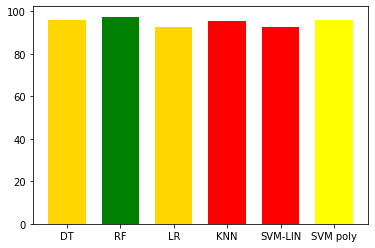

In [ ]:
plt.bar(ML_Model,Test,width=0.7,color=['gold','green','blue','red','yellow','brown'])

In [ ]:
import pickle
pickle.dump(log_reg,open('phishing_website.pkl','wb'))

##CONCLUSION:
 In this dataset, we are using logistic regression Algorithm to avoid overfitting